# Classificação de Imagens: Dia e Noite

Este projeto utiliza técnicas de visão computacional e machine learning
para classificar imagens em período diurno ou noturno.



In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Conexão com o Google Drive



In [43]:
IMAGE_PATH = "/content/drive/MyDrive/Dataset RAIA"


In [44]:
!ls "$IMAGE_PATH"


foto10.jpg  foto15.jpg	foto1.jpg   foto24.jpg	foto29.jpg  foto5.jpg
foto11.jpg  foto16.jpg	foto20.jpg  foto25.jpg	foto2.jpg   foto6.jpg
foto12.jpg  foto17.jpg	foto21.jpg  foto26.jpg	foto30.jpg  foto7.jpg
foto13.jpg  foto18.jpg	foto22.jpg  foto27.jpg	foto3.jpg   foto8.jpg
foto14.jpg  foto19.jpg	foto23.jpg  foto28.jpg	foto4.jpg   foto9.jpg


## Importação de Bibliotecas


In [45]:
import cv2
import os
import numpy as np

import re

images = []
names = []

def extract_number(name):
    return int(re.findall(r'\d+', name)[0])

files = sorted(
    os.listdir(IMAGE_PATH),
    key=extract_number
)

for file in files:
    if file.lower().endswith((".jpg", ".png", ".jpeg")):
        img = cv2.imread(os.path.join(IMAGE_PATH, file))
        images.append(img)
        names.append(file)

print("Total:", len(images))


Total: 30


In [46]:
def classify_brightness(img, threshold=100):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean = np.mean(gray)

    if mean > threshold:
        return "Dia"
    else:
        return "Noite"


In [47]:
results_brightness = []

for img in images:
    r = classify_brightness(img)
    results_brightness.append(r)


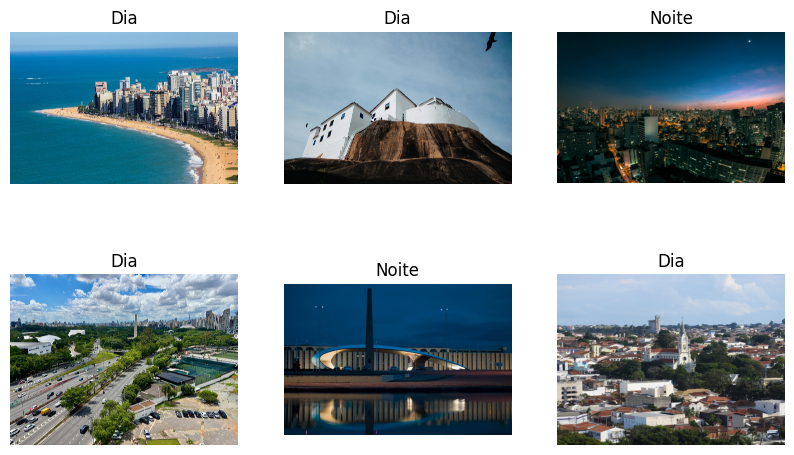

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for i in range(min(6, len(images))):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(results_brightness[i])
    plt.axis("off")

plt.show()


In [49]:
def extract_histogram(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hist = cv2.calcHist([gray],[0],None,[64],[0,256])
    hist = cv2.normalize(hist, hist)

    return hist.flatten()


In [50]:
features = []

for img in images:
    f = extract_histogram(img)
    features.append(f)

X = np.array(features)


In [51]:
labels = [
   "Dia","Dia","Noite","Dia","Noite","Dia","Noite","Dia","Dia","Noite",
   "Dia","Noite","Dia","Dia","Noite","Dia","Dia","Noite","Noite","Dia",
   "Dia","Noite","Noite","Dia","Dia","Noite","Noite","Noite","Noite","Dia"
]

y = np.array(labels)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [53]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)


In [54]:
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [55]:
from sklearn.metrics import accuracy_score

pred_test = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, pred_test))


Acurácia: 0.8333333333333334


In [56]:
Acurácia: 0.83


In [57]:
pred_all = model.predict(X)


In [58]:
import pandas as pd

df = pd.DataFrame({
    "Imagem": names,
    "Classe_Real": y,
    "Predicao_Modelo": pred_all
})

df


,Imagem,Classe_Real,Predicao_Modelo
0,foto1.jpg,Dia,Dia
1,foto2.jpg,Dia,Dia
2,foto3.jpg,Noite,Noite
3,foto4.jpg,Dia,Dia
4,foto5.jpg,Noite,Noite
5,foto6.jpg,Dia,Dia
6,foto7.jpg,Noite,Noite
7,foto8.jpg,Dia,Dia
8,foto9.jpg,Dia,Noite
9,foto10.jpg,Noite,Noite


In [59]:
df.to_csv("classificacao_dia_noite.csv", index=False)


In [60]:
print(names[:10])


['foto1.jpg', 'foto2.jpg', 'foto3.jpg', 'foto4.jpg', 'foto5.jpg', 'foto6.jpg', 'foto7.jpg', 'foto8.jpg', 'foto9.jpg', 'foto10.jpg']


In [61]:
print(len(names), len(labels))


30 30
